# Experimenting with shadow patterns on a PV system
Using PVMismatch (Mikofski et al.) and a simple excel-python I/O tool (Bognár et al.) pvmmxlsio.
Pvmmxlsio was made for easy manual experimentation with different shadow patterns on PVMismatch PV system models.

## Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pvmismatch.pvmismatch_lib import pvcell, pvconstants, pvmodule, pvstring, pvsystem
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'xlsio')))
from xlsio import *
# PVMismatch is developed by Mark Mikofski, Bennet Meyers and Chetan Chaudhari at SunPower Corporation, Richmond, CA.
# PVMismatch Project: https://github.com/SunPower/PVMismatch

## PVMismatch
Defining cell, module and PV system parameters:

In [2]:
str_len = 6 # number of modules in a string
str_num = 3 # number of (parallel connected) strings in the array
v_bypass = np.float64(-0.5)  # [V] trigger voltage of bypass diode
cell_area = np.float64(246.49)  # [cm^2] cell area
ncols_per_substr=[2]*3 # 3 bypass diodes with 2 series connected cell-columns each
nrows=10 # number of cell rows in the module

Building a PV system in PVMismatch:

In [3]:
pv_mod_pattern = pvmodule.standard_cellpos_pat(nrows=nrows, ncols_per_substr=ncols_per_substr)
pv_mod = pvmodule.PVmodule(cell_pos=pv_mod_pattern, pvcells=None, pvconst=None, Vbypass=v_bypass, cellArea=cell_area)
pv_str = pvstring.PVstring(numberMods=str_len, pvmods=[pv_mod]*str_len)
pv_sys = pvsystem.PVsystem(numberStrs=str_num, pvstrs=[pv_str]*str_num, numberMods=[str_len]*str_num, pvmods=[pv_mod]*str_len)

## PVMismatch xls I/O
Creating a human-readable xls of the PV system layout with the PV cell indexes, irradiances and temperatures with pvmmxlsio.
Also calculating the PV system power with PVMismatch using the default 1000 W/m2 irradiance.

PV power with 1 suns on all cells:  3614.2942906287917  [W]


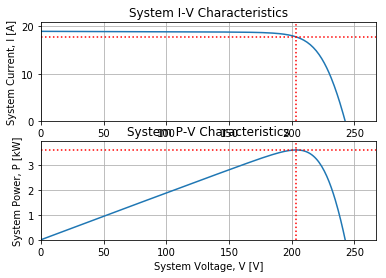

In [4]:
output_xls_name='ExcelLayoutFromPVMM.xlsx' # this is the module and system layout in xls
pvmm_system_layout_to_xls(output_xls_name, pv_sys, nrows)
print('PV power with 1 suns on all cells: ', pv_sys.calcSystem()[2].max(), ' [W]')
plot = pv_sys.plotSys()
plt.show(block=False)

Now let's change the Irradiance in the xls files and save them with a different name.
I have already done it, see ExcelLayoutFromPVMM_input_1-5.xlsx files.

![](ExcelShadePatterns.png "shadow patterns in excel")

* The 3 yellow columns are the 3 PV strings we defined earlier.
* Each cell in the xls file is a PV cell
* Labels for PV modules (in the xls files):
    * Rows: **m_cr**, where m is the number of the given module within the string and cr is the cell row within the module
    * Columns: **s_b_cc**, where s is the number of the string in the PV system, b is the number of the bypass diode in the module and cc is the number of the PV cell column within a PV module substring. Therefore a cell with the labels "2_7" (m_cr) and "1_2_1" (s_b_cc) is a PV cell in the 8th cell row of the second column of the 3rd bypass diode of the 3rd module of the 2nd string (everything is zero-indexed).

![](ExampleForShadowInput.PNG "shadow pattern in excel")

Now we can read in the irradiance patterns we made and calculate the PV system power with PVMismatch:

PV power with irradiances read in from ExcelLayoutFromPVMM_input1.xlsx:  2947.2931445177933  [W]


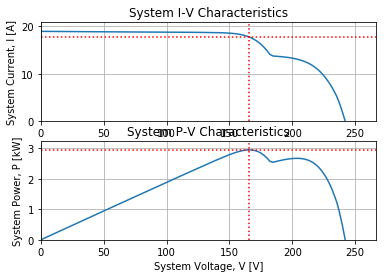

PV power with irradiances read in from ExcelLayoutFromPVMM_input2.xlsx:  2947.8187103735  [W]


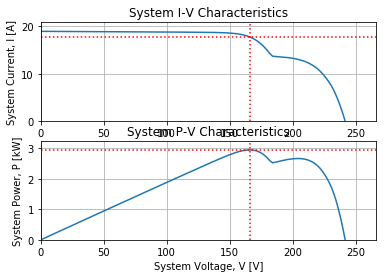

PV power with irradiances read in from ExcelLayoutFromPVMM_input3.xlsx:  2838.05761868432  [W]


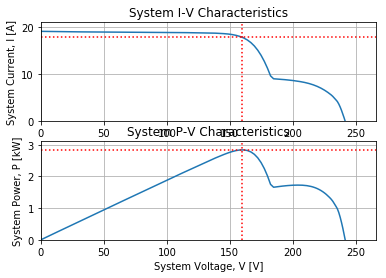

PV power with irradiances read in from ExcelLayoutFromPVMM_input4.xlsx:  2983.041324075766  [W]


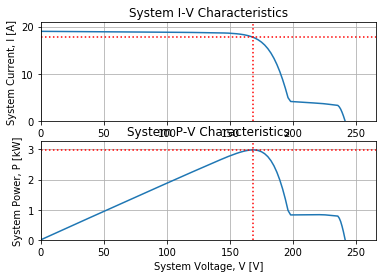

PV power with irradiances read in from ExcelLayoutFromPVMM_input5.xlsx:  2353.94076715778  [W]


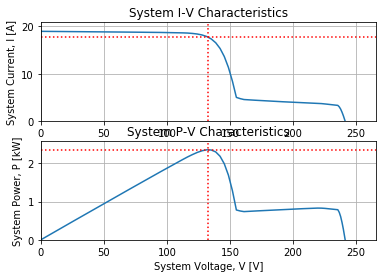

In [5]:
for i in list(range(1,6)):
    input_xls_name='ExcelLayoutFromPVMM_input{}.xlsx'.format(i) # this is the xls where we have set the new irradiances
    pvmm_set_suns_from_xls(input_xls_name, pv_sys, str_num, str_len, nrows)
    print('PV power with irradiances read in from {}: '.format(input_xls_name), pv_sys.calcSystem()[2].max(), ' [W]')
    pv_sys.plotSys()
    plt.show(block=False)